# Exploratory Data Analysis

### Dataset: parkinson_sample.csv

### B. Exploratory data analysis and clustering

#### i. Perform exploratory data analysis. Summarise your findings in a markdown cell

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./parkinson_sample.csv')
df.describe()

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,...,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,21.500000,64.404762,0.333333,93.393790,28.525276,0.006031,0.000043,0.002920,0.003212,0.008759,...,0.305911,0.016903,0.019812,0.027102,0.050710,0.031594,21.747740,0.538971,0.652299,0.217377
std,12.123806,9.131039,0.471517,53.669701,10.673869,0.005389,0.000034,0.002997,0.003691,0.008992,...,0.232377,0.013523,0.016926,0.020530,0.040568,0.060153,4.292231,0.102144,0.070405,0.092894
min,1.000000,36.000000,0.000000,-4.262500,7.000000,0.000900,0.000002,0.000400,0.000450,0.001210,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000304,1.659000,0.151020,0.519770,0.021983
25%,11.000000,58.000000,0.000000,47.217750,21.110000,0.003490,0.000022,0.001557,0.001760,0.004667,...,0.170000,0.008997,0.010530,0.015357,0.026985,0.010521,19.500250,0.465392,0.595222,0.152380
50%,21.500000,65.000000,0.000000,92.333000,27.213500,0.004770,0.000033,0.002200,0.002420,0.006590,...,0.247000,0.013430,0.015570,0.022205,0.040295,0.017671,21.982000,0.540975,0.642460,0.200170
75%,32.000000,72.000000,1.000000,140.320000,35.392250,0.006632,0.000052,0.003250,0.003420,0.009750,...,0.362000,0.020390,0.023428,0.032445,0.061172,0.030517,24.491250,0.613270,0.708835,0.263622
max,42.000000,85.000000,1.000000,215.490000,54.992000,0.089290,0.000389,0.057540,0.069560,0.172630,...,1.970000,0.162670,0.167020,0.275460,0.488020,0.748260,37.187000,0.935070,0.865600,0.731520


In [3]:
df.isna().sum()

subject#         0
age              0
sex              0
test_time        0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

From the result above, there's no missing value in the dataset.

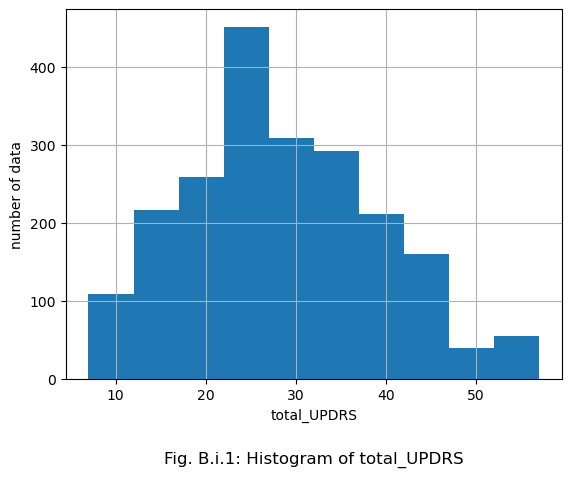

In [4]:
# plot a histogram of age
data = df['total_UPDRS']
data.hist(bins=np.arange(min(data), max(data) + 5, 5))
plt.xlabel('total_UPDRS')
plt.ylabel('number of data')
plt.title('Fig. B.i.1: Histogram of total_UPDRS', y=-0.25)
plt.show()

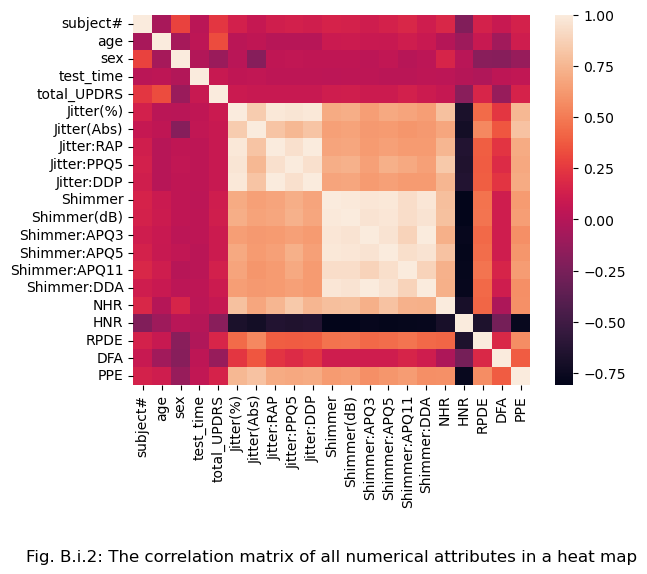

In [5]:
import seaborn as sns
sns.heatmap(df.corr());
plt.title('Fig. B.i.2: The correlation matrix of all numerical attributes in a heat map', y=-0.5)
plt.show()

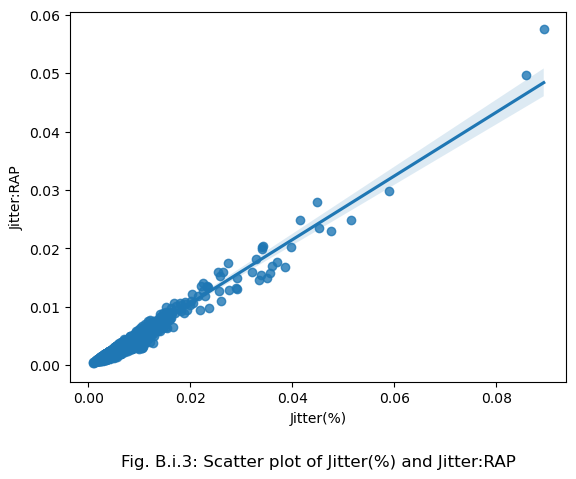

In [6]:
sns.regplot(data=df, x='Jitter(%)', y='Jitter:RAP')
plt.title('Fig. B.i.3: Scatter plot of Jitter(%) and Jitter:RAP', y=-0.25)
plt.show()

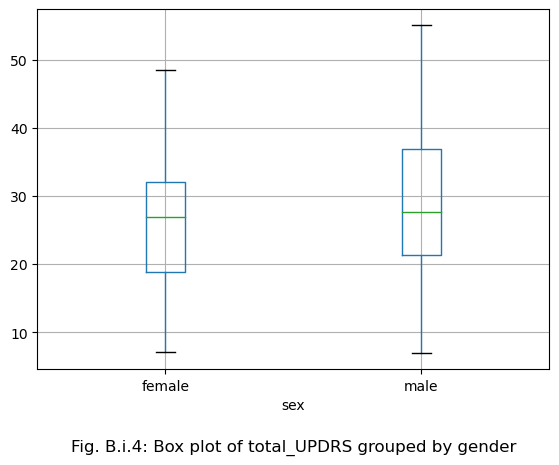

In [7]:
mapper = {0: 'male', 1: 'female'}
df_sex = df[['total_UPDRS','sex']].copy()
df_sex['sex'] = df_sex['sex'].replace(mapper)
df_sex.boxplot(column='total_UPDRS', by='sex')
plt.title('Fig. B.i.4: Box plot of total_UPDRS grouped by gender', y=-0.25)
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

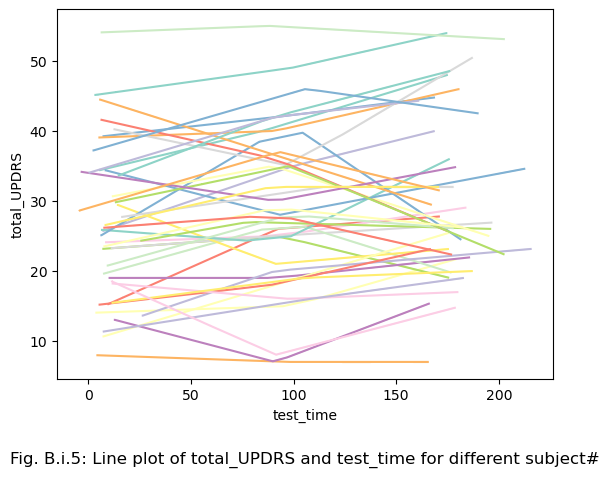

In [8]:
sns.lineplot(data=df, x='test_time', y='total_UPDRS', hue='subject#', palette="Set3", legend=None)
plt.title('Fig. B.i.5: Line plot of total_UPDRS and test_time for different subject#', y=-0.25)
plt.show()

##### Summary

This program involved the use of the Parkinson dataset, which is a collection of biomedical voice measurements from 42 individuals with early-stage Parkinson's disease who were recruited for a six-month telemonitoring trial aimed at remote symptom progression monitoring. The primary objective of this dataset was to predict the total UPDRS scores, which are an important measure of the severity of Parkinson's disease, from the other 16 features.
<br>
During the exploratory data analysis phase, I examined the distribution of the 'total_UPDRS' column as shown in Fig. B.i.1 and found that it closely resembled a normal distribution. This suggests that there may be a lower possibility of bias in the data, which in turn could lead to more accurate predictions.
<br>
Furthermore, I used a heatmap in Fig. B.i.2 to explore the correlations between 'total_UPDRS' and the other features, and identified that 'age', 'PPE', 'RPDE', and 'Shimmer:APQ11' had a high correlation with 'total_UPDRS'. This finding could be leveraged to give higher weight to these features during prediction and improve the accuracy of our model.
<br>
From Fig. B.i.3, I also used a scatterplot to investigate the relationship between the 'Jitter(%)' and 'Jitter:RAP' features, and found that the ratio of their values did not vary significantly. This implies that one of these features could be removed from the dataset to reduce its dimensionality without affecting the results.
<br>
A box plot of Fig. B.i.4 I used to examine the effect of sex on 'total_UPDRS', and I found that the mean values of 'total_UPDRS' for males and females were similar. This suggests that sex is not a significant factor in determining the 'total_UPDRS' score.
<br>
Finally, in Fig. B.i.5, I examined the impact of 'test_time' on 'total_UPDRS' and found no significant trend suggesting that 'total_UPDRS' would either increase or decrease with 'test_time'. Therefore, I concluded that 'test_time' does not have a large impact on the prediction of 'total_UPDRS'.
<br>
Overall, my exploratory data analysis allowed me to identify important features and correlations in the Parkinson dataset, which could inform the development of accurate predictive models for Parkinson's disease severity.

#### ii. Apply a clustering algorithm to your dataset and visualise the clustering.

##### Find outliers

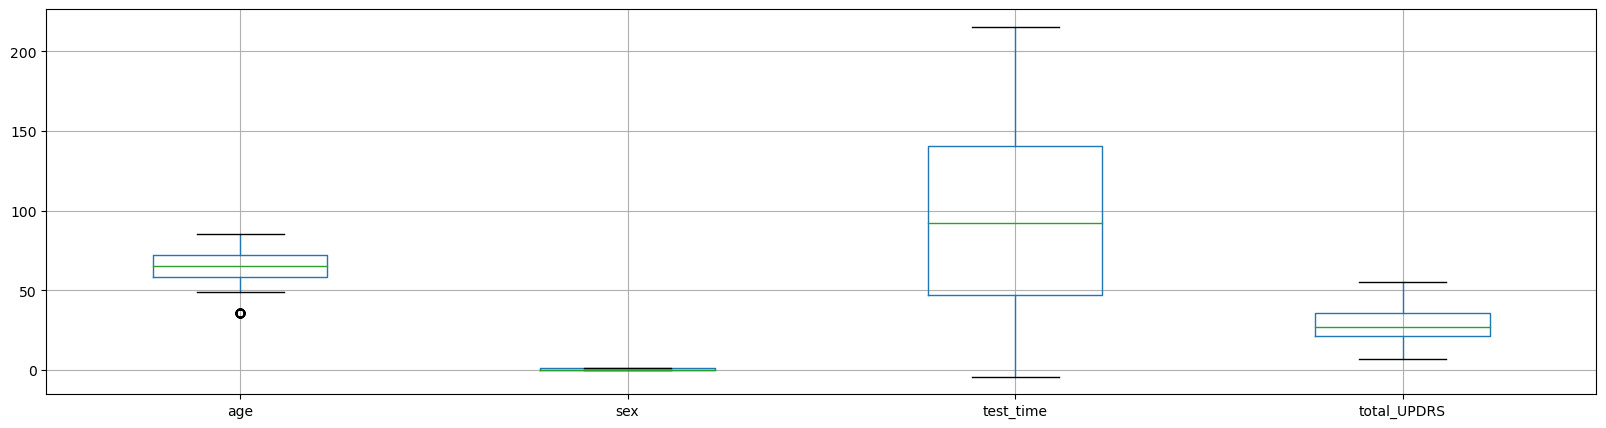

In [9]:
from sklearn import preprocessing
df.loc[:,'age':'total_UPDRS'].boxplot(figsize=(20,5))
plt.show()

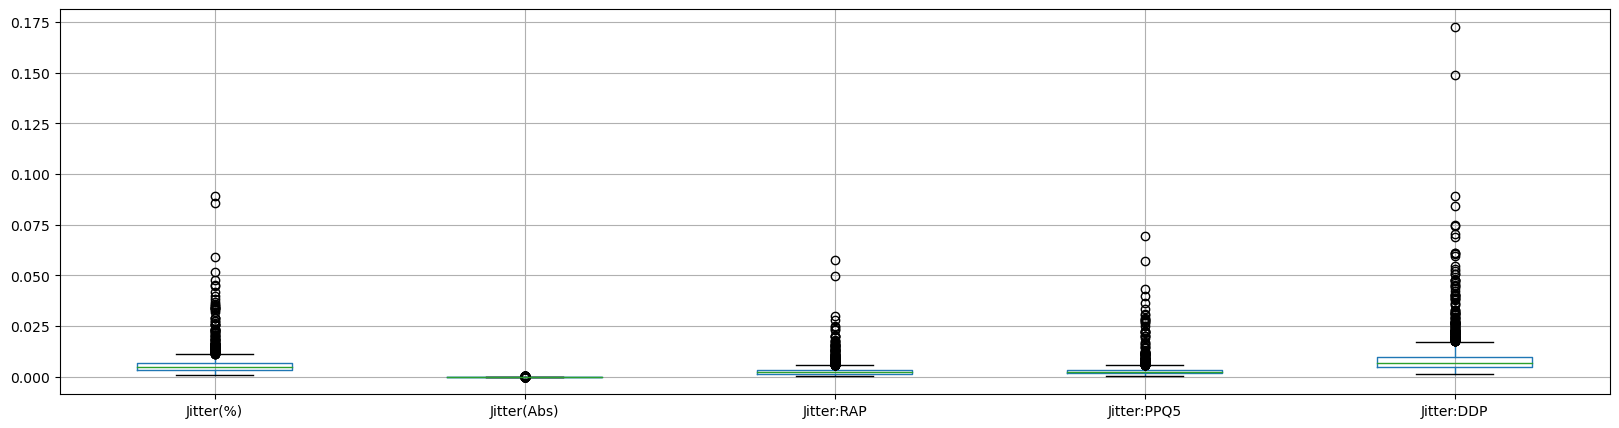

In [10]:
df.loc[:,'Jitter(%)':'Jitter:DDP'].boxplot(figsize=(20,5))
plt.show()

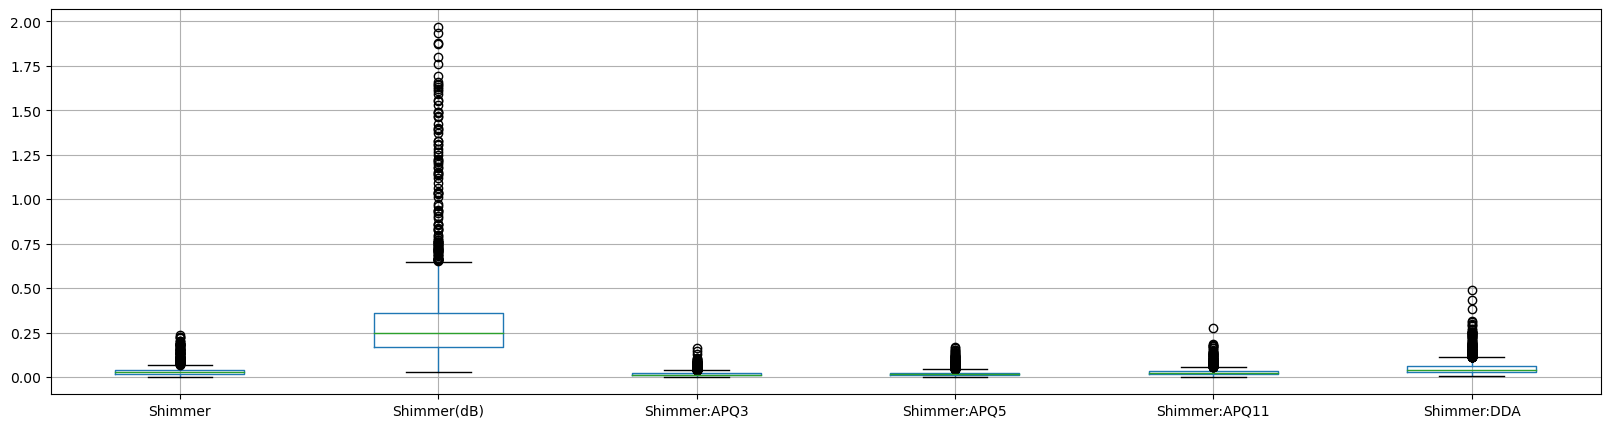

In [11]:
df.loc[:,'Shimmer':'Shimmer:DDA'].boxplot(figsize=(20,5))
plt.show()

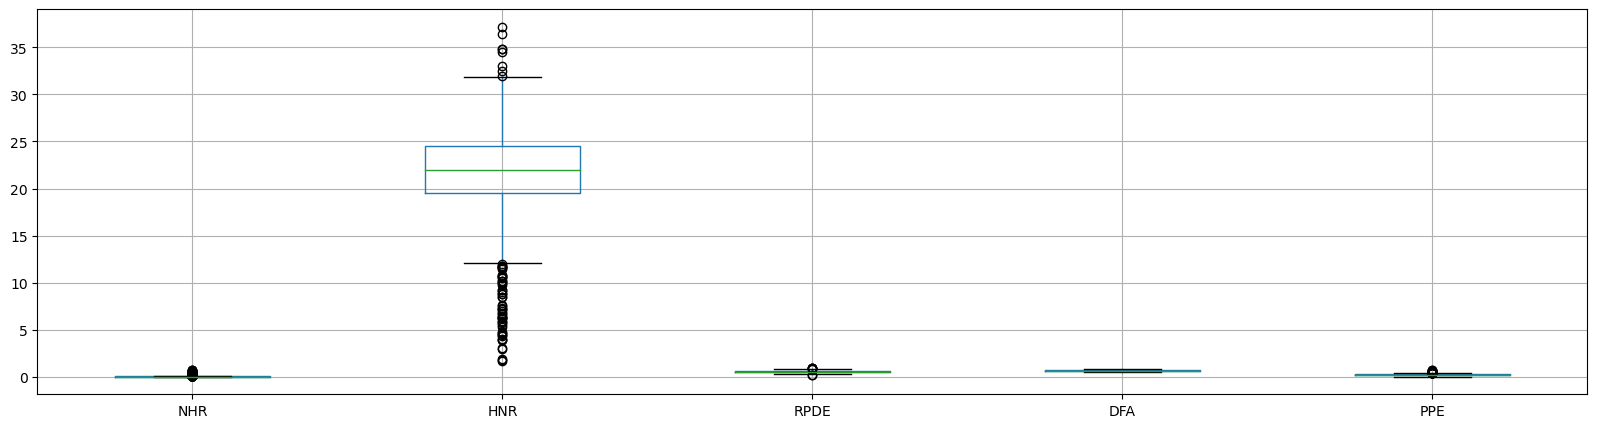

In [12]:
df.loc[:,'NHR':'PPE'].boxplot(figsize=(20,5))
plt.show()

##### Use different scaler for outlier/no_outlier columns

In [13]:
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer

# store a list with the names of all predictors
names_all = [c for c in df]

# define column groups with same data preparation
names_no_outliers = ['sex', 'test_time', 'total_UPDRS']
names_outliers = list(set(names_all) - set(names_no_outliers))

In [14]:
standard_scaler = StandardScaler()
df[names_no_outliers] = standard_scaler.fit_transform(df[names_no_outliers])

robust_scaler = RobustScaler()
df[names_outliers] = robust_scaler.fit_transform(df[names_outliers])

##### Clustering

In [15]:
from sklearn import cluster
from sklearn import manifold

colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])
def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')
    
    plt.show()

k_arr = range(2,16)
inertia_arr = []

##### Find the best number of clusters


clusters: 2


C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


transformation complete


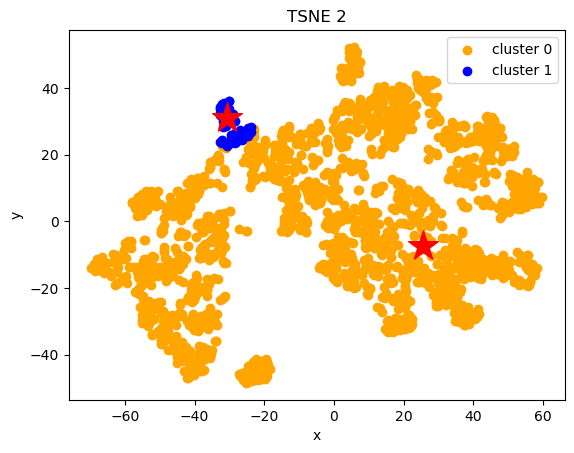


clusters: 3


C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


transformation complete


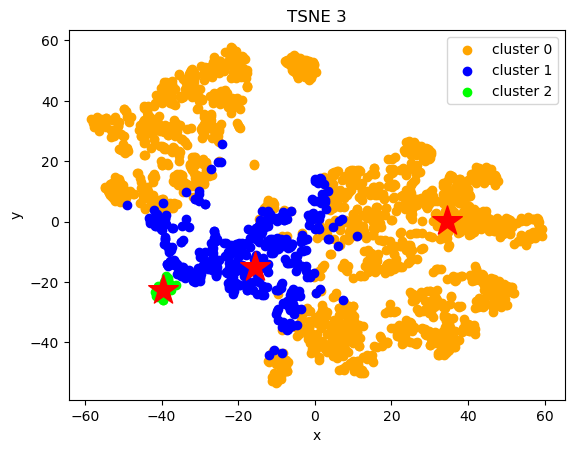


clusters: 4


C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


transformation complete


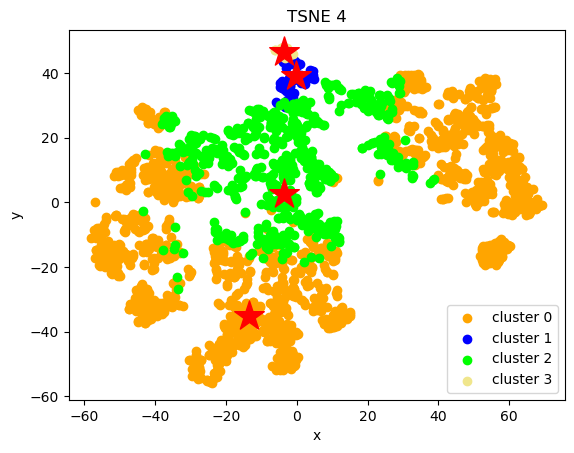


clusters: 5


C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


transformation complete


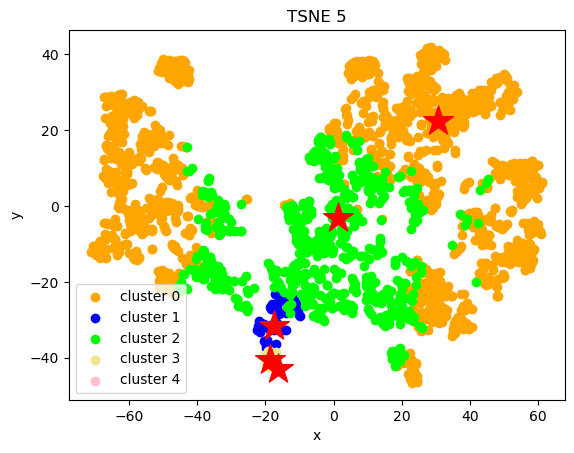


clusters: 6


C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


transformation complete


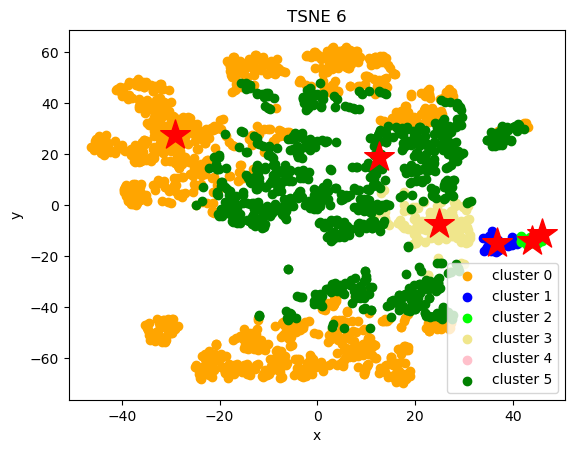


clusters: 7


C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


transformation complete


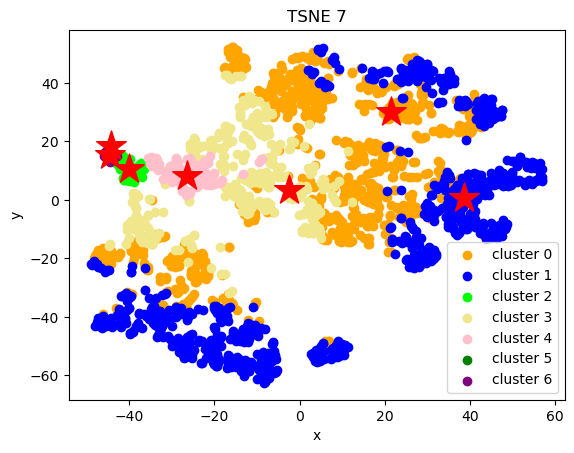


clusters: 8


C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


transformation complete


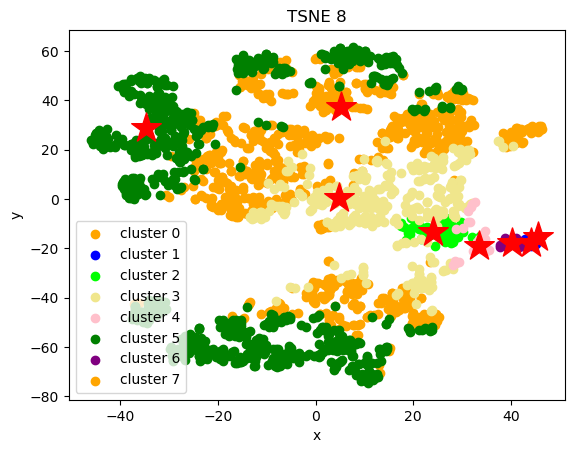


clusters: 9


C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


transformation complete


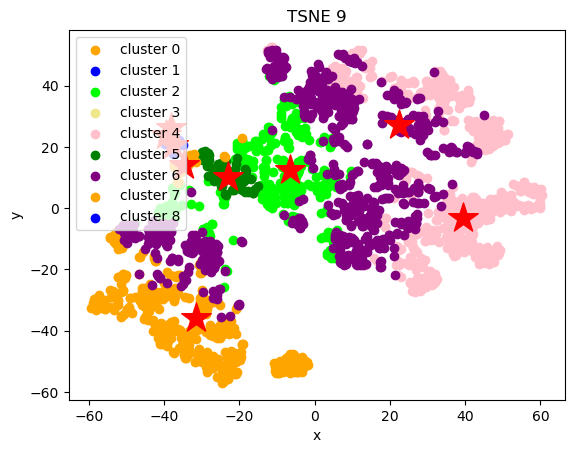


clusters: 10


C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


transformation complete


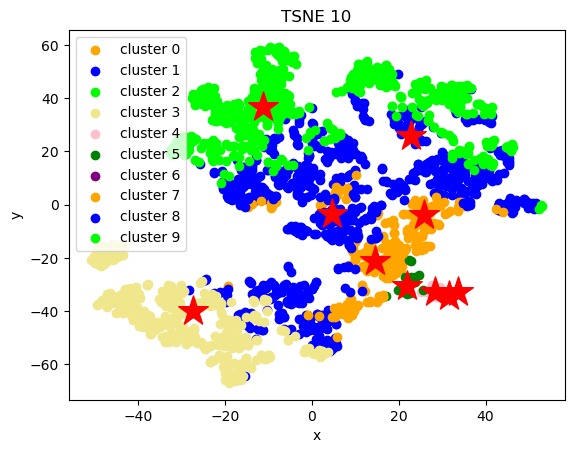


clusters: 11


C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


transformation complete


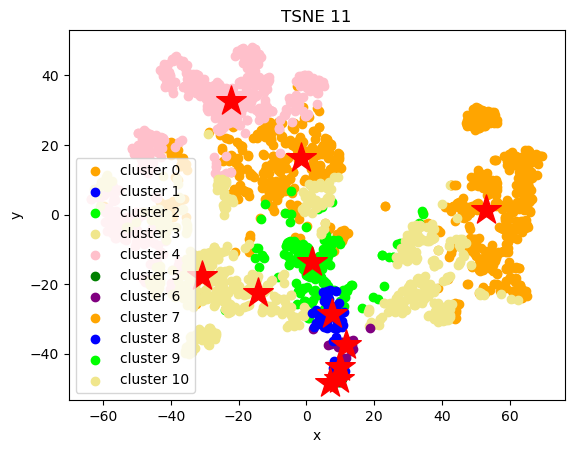


clusters: 12


C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


transformation complete


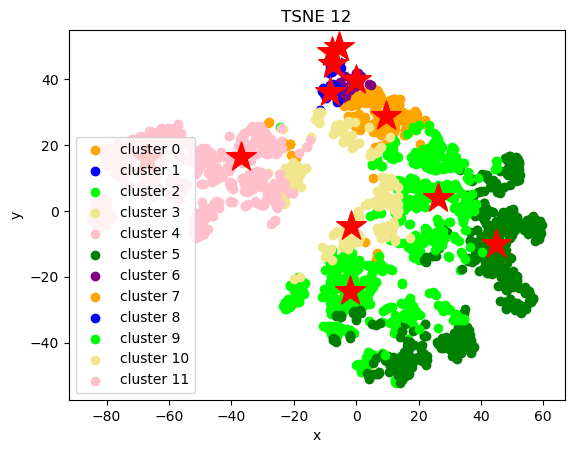


clusters: 13


C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


transformation complete


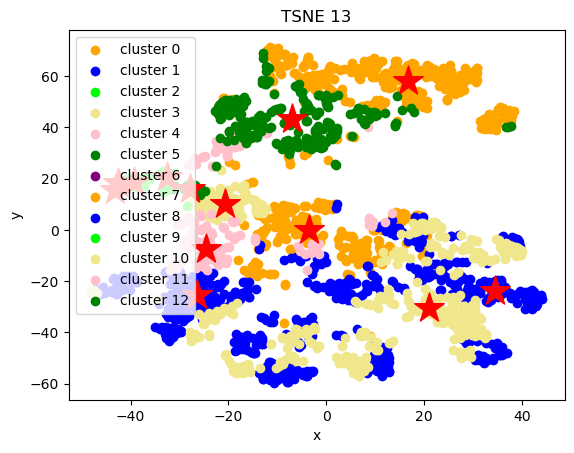


clusters: 14


C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


transformation complete


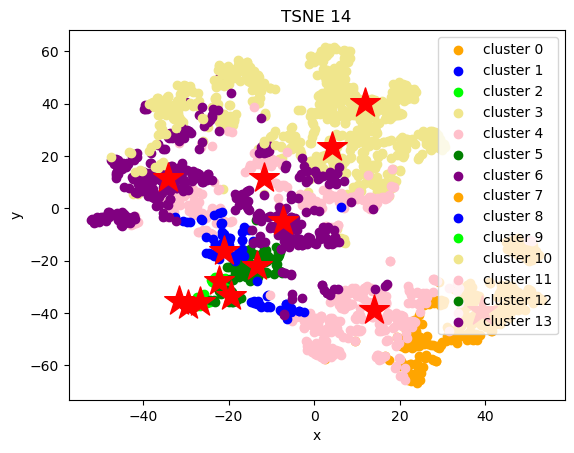


clusters: 15


C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


transformation complete


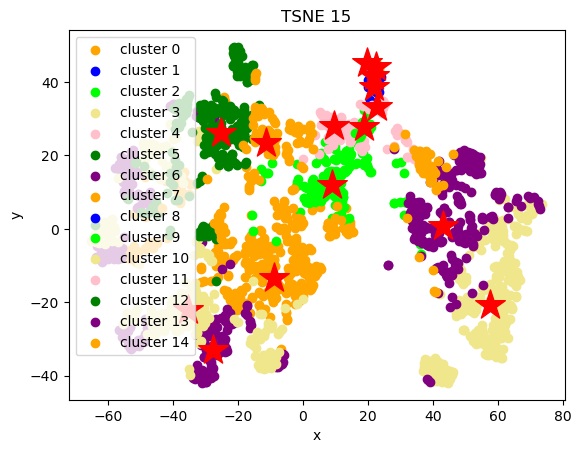

In [16]:
for k in k_arr:
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(df)
    data_and_centers = np.r_[df, clustered_data_sklearn.cluster_centers_]

    print('\nclusters: ' + str(k))
    # visualization
    XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
    print("transformation complete")
    clustering_scatterplot(points=XYcoordinates[:-k,:], 
                           labels=clustered_data_sklearn.labels_,
                           centers=XYcoordinates[-k:,:], 
                           title='TSNE ' + str(k))
    #print(clustered_data_sklearn.inertia_)
    inertia_arr.append(clustered_data_sklearn.inertia_)

##### Elbow method

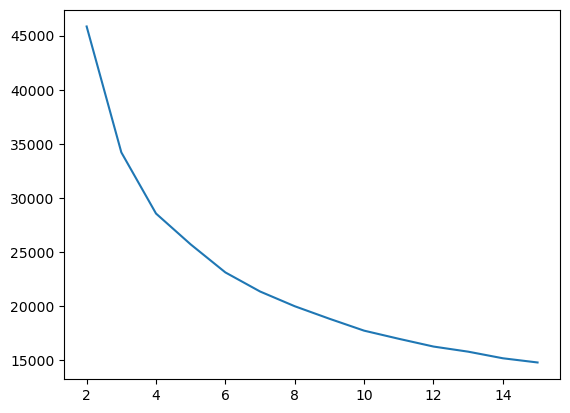

In [17]:
plt.plot(k_arr, inertia_arr)

##### Summary

In this section of my analysis, I utilized the KMeans clustering algorithm to examine the structure of our dataset. Before implementing KMeans, I first checked for any outliers in each feature by creating box plots. Following this, I used the StandardScaler for columns without outliers and the RobustScaler for columns with outliers to ensure that our data was properly scaled and ready for clustering.
<br>
To determine the optimal number of clusters for our dataset, I plotted the different clustering results after reducing the dimension. My analysis showed that there may not be any distinct clusters present within the data. However, with a larger number of clusters, I observed more reasonable results. I also examined the elbow method plot to determine the best number of clusters, but there was no clear "elbow" point that suggested a particular number of clusters.
<br>
Clustering algorithms group similar data points together based on some similarity or distance metric. In the context of the dataset, clustering could potentially be used to identify subgroups of patients with similar symptoms or disease progression patterns. This could provide insight into the heterogeneity of the disease and potentially lead to more personalized treatment approaches.
<br>
However, clustering is an unsupervised learning technique, meaning that it does not take into account any labels or outcomes that might be of interest, such as the 'total_UPDRS' scores or disease progression. Therefore, clustering on its own may not provide information that is directly relevant to the main goal of predicting 'total_UPDRS' scores.

### C. Predictive modelling

#### i. Model 1: Random Forest algorithm

StandardScaler is applied as the outliers are already treated.

In [18]:
from sklearn.pipeline import Pipeline, make_pipeline
preprocess_pipeline = make_pipeline(StandardScaler())

Separate the columns into target and predictors and split the dataset into a training and test sets.

In [19]:
from sklearn.model_selection import train_test_split
y = df['total_UPDRS']
X = df.drop('total_UPDRS', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [20]:
from sklearn.ensemble import RandomForestRegressor
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', RandomForestRegressor(n_estimators=10))])

We limit the parameter grid to a few options for the max_depth parameter of RandomForestRegressor and to three alternative values for the number of selected features by the dimensionality reduction method.

In [21]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

N_FEATURES_OPTIONS = [2, 6, 11]
MAX_DEPTH_OPTIONS = [2, 4, 6, 8]

param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__max_depth': MAX_DEPTH_OPTIONS
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regresson__max_depth': MAX_DEPTH_OPTIONS
    }  
]

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train)

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
RF_best_params = search.best_params_
RF_best_model = search.best_estimator_

Best CV score = 0.928:
Best parameters:  {'reduce_dim': RFE(estimator=SVR(gamma='auto', kernel='linear'), n_features_to_select=2), 'reduce_dim__n_features_to_select': 2, 'regresson__max_depth': 8}


#### ii. Model 2: Linear Regression Algorithm

In [22]:
from sklearn.linear_model import LinearRegression
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', LinearRegression())])

we limit the parameter grid to one parameter of LinearRegression and three alternative values for the number of selected features to make sure the grid search does not take too long to execute.

In [23]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm
N_FEATURES_OPTIONS = [2, 6, 11]
NORMALIZE_OPTIONS = [False, True]

param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    }  
]

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
LR_best_params = search.best_params_
LR_best_model = search.best_estimator_

Best CV score = 0.241:
Best parameters:  {'reduce_dim': PCA(iterated_power=7, n_components=11), 'reduce_dim__n_components': 11, 'regresson__normalize': False}


C:\Users\ROSMY\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


#### iii. Model 3: Support Vector Machines (SVM)

In [24]:
from sklearn import svm
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regression', svm.SVR(kernel='rbf', gamma='auto', C=1.0, epsilon=0.1))])

In [25]:
N_FEATURES_OPTIONS = [2, 6, 11]
NORMALIZE_OPTIONS = [False, True]

param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regression': [svm.SVR(kernel='rbf', gamma='auto', C=1.0, epsilon=0.1)]
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regression': [svm.SVR(kernel='rbf', gamma='auto', C=1.0, epsilon=0.1)]
    }  
]

pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regression', svm.SVR(kernel='rbf', gamma='auto', C=1.0, epsilon=0.1))])

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train)

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
SVM_best_params = search.best_params_
SVM_best_model = search.best_estimator_


Best CV score = 0.666:
Best parameters:  {'reduce_dim': PCA(iterated_power=7, n_components=11), 'reduce_dim__n_components': 11, 'regression': SVR(gamma='auto')}


## Compare Regression Models on Test Set

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# model - a trained regression model

def evaluate_model(X_test, y_test, model):
    
    # compute predictiond for the test set
    _predicted_values = model.predict(X_test)
        
    # compute metrics
    _mse = mean_squared_error(y_test, _predicted_values)
    _mae = mean_absolute_error(y_test, _predicted_values)
    _r2 = r2_score(y_test, _predicted_values)
            
    return _mse, _mae, _r2

In [27]:
RF_mse, RF_mae, RF_r2 = evaluate_model(X_test, y_test, RF_best_model)
LR_mse, LR_mae, LR_r2 = evaluate_model(X_test, y_test, LR_best_model)
SVM_mse, SVM_mae, SVM_r2 = evaluate_model(X_test, y_test, SVM_best_model)

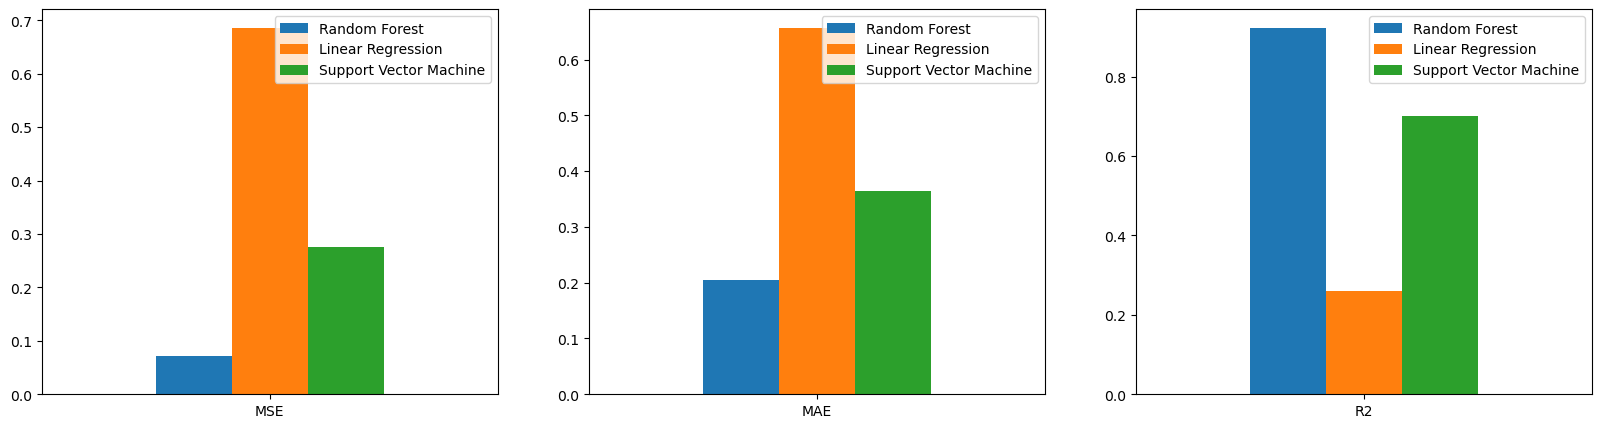

In [28]:
df_mse = pd.DataFrame({'Random Forest': RF_mse, 'Linear Regression': LR_mse, 'Support Vector Machine': SVM_mse}, index=['MSE'])
df_mae = pd.DataFrame({'Random Forest': RF_mae, 'Linear Regression': LR_mae, 'Support Vector Machine': SVM_mae}, index=['MAE'])
df_r2 = pd.DataFrame({'Random Forest': RF_r2, 'Linear Regression': LR_r2, 'Support Vector Machine': SVM_r2}, index=['R2'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

df_mse.plot.bar(rot=0, ax=axes[0])
df_mae.plot.bar(rot=0, ax=axes[1])
df_r2.plot.bar(rot=0, ax=axes[2])

plt.show()

The results show that Random Forest and SVM perform better than Linear Regression in terms of mean squared error, mean absolute error, and R-squared. Out of the three algorithms, SVM has the second-best performance, behind Random Forest, which has the best overall performance.

Random Forest is an algorithm for ensemble learning that combines the decisions from multiple decision trees in order to produce predictions. It is able to deal with high-dimensional data without resorting to overfitting and maintains the ability to handle non-linear relationships between the target variable and the features.

The SVM algorithm, on the other hand, takes a discriminative approach and searches for the hyperplane in the feature space that creates the best division between the classes. It is also capable of handling non-linear relationships thanks to the utilisation of kernel functions; however, when applied to large datasets, it can be computationally expensive.

On the other hand, linear regression is an algorithm that is simple and easy to comprehend. It works on the basis of the assumption that there is a linear relationship between the target variable and the features. In spite of the ease with which it can be implemented and trained, it may not be as effective as other algorithms when applied to non-linear data.

According to the results Random Forest and SVM are superior algorithms for the current regression task. This conclusion is based on the results I got.